<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/Content/Data_Visualization/24_Amounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize Amounts

To get started in visualizing, we'll look at one of the simplest ideas, single quantaties.  Let's grab some data too!

In [ ]:
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Data_Sets/iris.csv')

## Bar Charts

I'll give a small bar chart of the means of the different Classes of flowers.

In [ ]:
df.groupby('Class').SepalLength.agg('mean')

Class
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLength, dtype: float64

<AxesSubplot:xlabel='Class'>

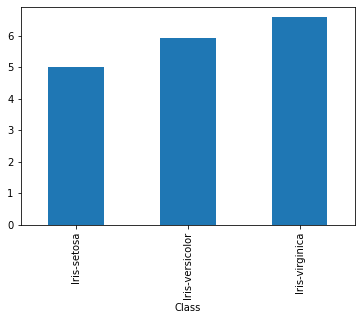

In [ ]:
df.groupby('Class').SepalLength.agg('mean').plot(kind = 'bar')

<AxesSubplot:xlabel='Class'>

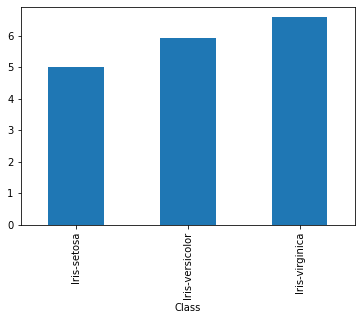

In [ ]:
df.groupby('Class').SepalLength.agg('mean').plot.bar()

There are lots of options some of which we should be using reguarly.  A title is always nice

<AxesSubplot:title={'center':'Mean by Class'}, xlabel='Class'>

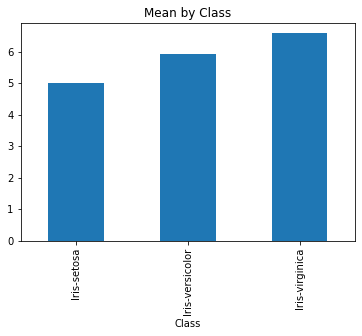

In [ ]:
df.groupby('Class').SepalLength.agg('mean').plot(kind = 'bar', title = 'Mean by Class')

A vertical description on what the $y$ axis represents should not be forgotten!

<AxesSubplot:title={'center':'Mean by Class'}, xlabel='Class', ylabel='Mean of Sepal Length'>

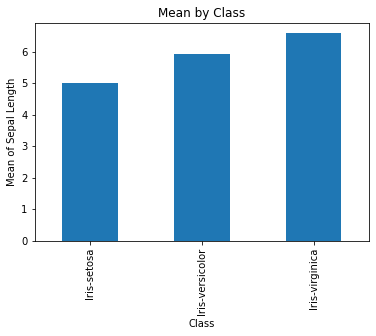

In [ ]:
df.groupby('Class').SepalLength.agg('mean').plot(kind = 'bar',
                                                 title = 'Mean by Class', 
                                                 ylabel= 'Mean of Sepal Length')


One of the complaints about a graphic like this is the length of the class titles.  It takes up a lot of vertical space.  With a `barh` you can change the orientation of the bars.

<AxesSubplot:title={'center':'Mean by Class'}, ylabel='Class'>

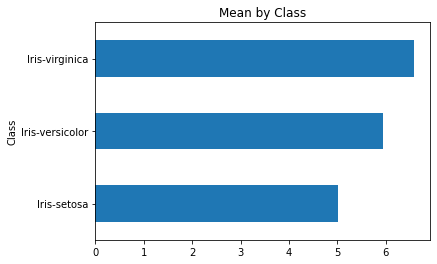

In [ ]:
df.groupby('Class').SepalLength.agg('mean').plot(kind = 'barh',
                                                 title = 'Mean by Class', 
                                                 ylabel= 'Mean of Sepal Length')

I couldn't get the label of the values to appear, maybe you can?

If there are lots of values, don't use bars!  Let's see this with a different dataset.

In [ ]:
df2 = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Activity_Dataset_V1.csv')

In the following graph it is very difficult to follow the data points across.  

<AxesSubplot:ylabel='workout_type'>

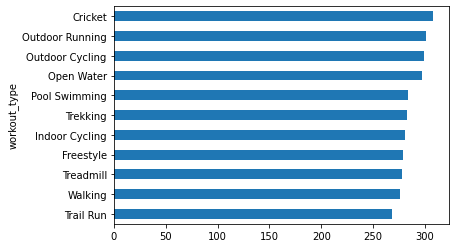

In [ ]:
df2.groupby('workout_type').calories.agg('mean').sort_values(ascending = True).plot(kind = 'barh')

To clear this up you could use a point instead of a bar!

## Dot Plots Work Well Too

<AxesSubplot:xlabel='mean', ylabel='workout_type'>

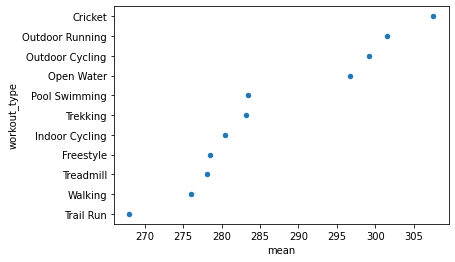

In [ ]:
df2.groupby('workout_type').calories.agg(['mean']).sort_values(by = 'mean',ascending = True).reset_index().plot.scatter(x = 'mean', y = 'workout_type')

This creates other issues in that the origin of the figure is not zero.  To fix that, we simply require that the x limits go from 0 to 310.

<AxesSubplot:xlabel='mean', ylabel='workout_type'>

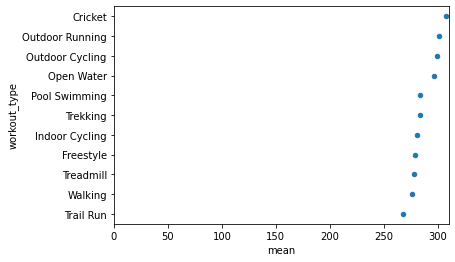

In [ ]:
df2.groupby('workout_type').calories.agg(['mean']).sort_values(by = 'mean',ascending = True).reset_index().plot.scatter(x = 'mean', y = 'workout_type', xlim = [0,310])

All the workout types are giving us about the same bang for our buck, at least in mean calories.

## Adding Labels

It might also be nice to see the numbers presented with the data.  This is esspecially nice for a small number of quantities.

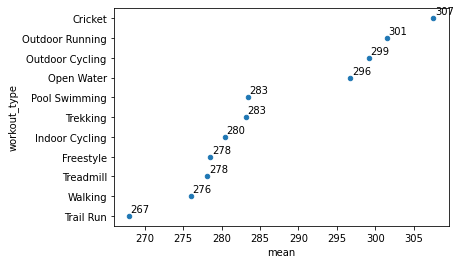

In [ ]:
ax = df2.groupby('workout_type').calories.agg(['mean']).sort_values(by = 'mean',ascending = True).reset_index().plot.scatter(x = 'mean', y = 'workout_type')#this made the same graph as above.

for i,k in enumerate(df2.groupby('workout_type').calories.agg(['mean']).sort_values(by = 'mean',ascending = True).reset_index()['mean']): #here I loop through the values, k, and indicies ,i.
  ax.annotate(str(int(k)),[k+.2,i+.2])



## Bar Charts with Multiple Data

<AxesSubplot:xlabel='Class'>

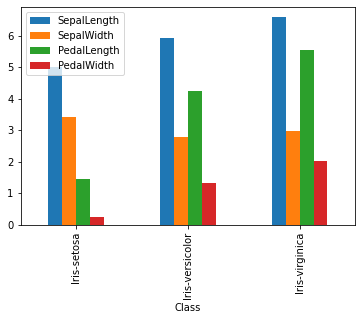

In [ ]:
df.groupby('Class').agg('mean').plot(kind = 'bar')

<AxesSubplot:xlabel='Class'>

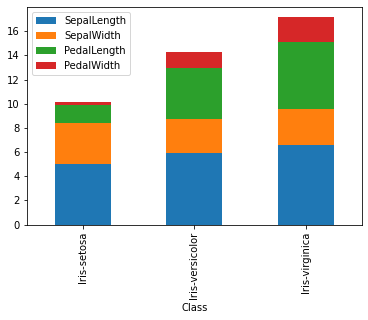

In [ ]:
df.groupby('Class').agg('mean').plot(kind = 'bar', stacked = True)

If you want to add labels, it should be simple but the version on colab is out of date...  I update here.

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
import matplotlib
matplotlib.__version__

'3.5.1'

Now with the correct version it is acually really easy.

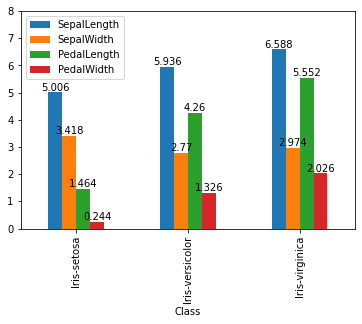

In [ ]:
ax = df.groupby('Class').agg('mean').plot(kind = 'bar', ylim =[0,8])

for container in ax.containers:
    ax.bar_label(container)

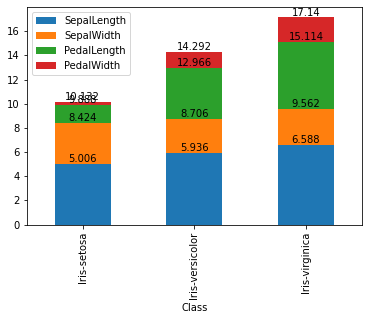

In [ ]:
ax = df.groupby('Class').agg('mean').plot(kind = 'bar', stacked = True)

for container in ax.containers:
    ax.bar_label(container)

Be careful with the stacked as it is giving a cummulative total.  This doesn't really make any sense here...

## Your Turn

Using the [Air B&B NYC data](https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Data_Sets/AB_NYC_2019.csv) complete the following tasks.

1. Create a bar graph of the maximum 'price' by 'neighbourhood_group'.  Include the 'price' in your graph
2. Create a multiple bar graph with 'neighbourhood_group' and 'room_type' by looking at the average 'price'.